| **Coluna**                   | **Significado**                                                                                 |
|-----------------------------|--------------------------------------------------------------------------------------------------|
| `ano`                       | Ano em que o dado foi registrado.                                                               |
| `mes`                       | Mês em que o dado foi registrado.                                                               |
| `data`                      | Data (dia/mês/ano) da observação.                                                               |
| `bioma`                     | Tipo de bioma onde a queimada foi registrada         |                                                |
| `id_municipio`             | Código identificador do município (geralmente do IBGE).                                        |
| `latitude`                  | Latitude do ponto onde ocorreu a queimada.                                                     |
| `longitude`                 | Longitude do ponto onde ocorreu a queimada.                                                    |
|                                                   |
| `dias_sem_chuva`           | Quantidade de dias consecutivos sem chuva antes da ocorrência da queimada.                     |
| `precipitacao`             | Quantidade de chuva (em milímetros) no dia do evento.                                          |
| `risco_fogo`               | Índice de risco de fogo. Quanto maior, maior o risco.                                           |
| `potencia_radiativa_fogo` | Energia da queimada detectada (em MW). Quanto maior, mais intensa a queimada.                  |


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../Dados/queimadas_pb.csv")
df.head()

,ano,mes,data,bioma,id_municipio,latitude,longitude,dias_sem_chuva,precipitacao,risco_fogo,potencia_radiativa_fogo
0,2007,1,2007-01-01,Caatinga,2511301,-7.125,-37.905,5,3.552308,0.447115,6.852830
1,2007,1,2007-01-02,Caatinga,2509396,-7.246,-37.334,4,0.007273,0.499091,8.625000
2,2007,1,2007-01-02,Caatinga,2512200,-7.653,-37.094,7,1.117200,0.601000,6.205455
3,2007,1,2007-01-03,Mata Atlântica,2503001,-7.482,-34.877,0,0.059474,0.845789,19.409524
4,2007,1,2007-01-03,Caatinga,2509701,-7.806,-37.132,4,0.800926,0.571420,11.135088


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59239 entries, 0 to 59238
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ano                      59239 non-null  int64  
 1   mes                      59239 non-null  int64  
 2   data                     59239 non-null  object 
 3   bioma                    59239 non-null  object 
 4   id_municipio             59239 non-null  int64  
 5   latitude                 59239 non-null  float64
 6   longitude                59239 non-null  float64
 7   dias_sem_chuva           59239 non-null  int64  
 8   precipitacao             59239 non-null  float64
 9   risco_fogo               59239 non-null  float64
 10  potencia_radiativa_fogo  59239 non-null  float64
dtypes: float64(5), int64(4), object(2)
memory usage: 5.0+ MB


| **Insight**                                              | **Objetivo / O que analisar**                                                                                                                                   |
| -------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **1. Ano com mais queimadas e menos chuvas**             | Identificar o ano com maior número de registros de queimadas e comparar com a média de `precipitacao`. |
| **2. Mês com mais queimadas e menos chuvas**             | Mesma ideia do anterior, mas em nível mensal. Pode revelar sazonalidade das queimadas .                                                       |
| **3. Bioma com maior risco de fogo**                     | Agrupar por `bioma` e analisar a média ou máximo de `risco_fogo`, para identificar onde o ambiente está mais vulnerável.                                        |
| **4. Latitude e longitude com mais queimadas**           | Encontrar os pontos geográficos com maior frequência de registros.             |
| **5. Precipitação e dias sem chuva com o risco de fogo** | Analisar correlação entre `precipitacao`, `dias_sem_chuva` e `risco_fogo`.                                        |
| **6. Relação entre bioma e precipitação média**           | Verificar se biomas com menor precipitação média têm maior risco de fogo.                                                                                       |
| **7. Mês x Risco de fogo por município**                  | Identificar meses mais críticos por município para ações preventivas direcionadas.                                                                              |
| **8. Correlação entre potência radiativa e risco de fogo**| Verificar se maior potência radiativa indica maior risco de fogo.                                                                                              |
| **9. Análise sazonal dos dias sem chuva e queimadas**     | Investigar se aumentos nos dias sem chuva em certos meses estão ligados a mais queimadas.                                                                       |
| **10. Mapa de hotspots de queimadas por bioma**           | Criar mapas para visualizar concentrações geográficas de queimadas em cada bioma.                                                                              |
| **11. Impacto das queimadas na precipitação subsequente** | Verificar se áreas com mais queimadas apresentam alteração na precipitação nos meses seguintes.                                                                |


# EDA

In [4]:
df.describe()

,ano,mes,id_municipio,latitude,longitude,dias_sem_chuva,precipitacao,risco_fogo,potencia_radiativa_fogo
count,59239.000000,59239.000000,5.923900e+04,59239.000000,59239.000000,59239.000000,59239.000000,59239.000000,59239.000000
mean,2020.177079,9.031196,2.509047e+06,-7.090382,-37.303661,23.784011,0.453176,0.863179,26.036148
std,6.385059,3.656072,5.021804e+03,0.403291,1.245731,28.158001,2.659578,0.269196,39.578977
min,2003.000000,1.000000,2.500106e+06,-8.294000,-38.762050,0.000000,0.000000,0.000000,0.000000
25%,2020.000000,9.000000,2.504405e+06,-7.397800,-38.264430,4.000000,0.000000,0.874737,5.400000
50%,2023.000000,10.000000,2.509404e+06,-7.082660,-37.836940,11.000000,0.000000,1.000000,11.300000
75%,2024.000000,11.000000,2.513604e+06,-6.793420,-36.189995,34.000000,0.074141,1.000000,27.444974
max,2025.000000,12.000000,2.517407e+06,-6.052000,-34.796130,120.000000,107.730000,1.000000,905.600000


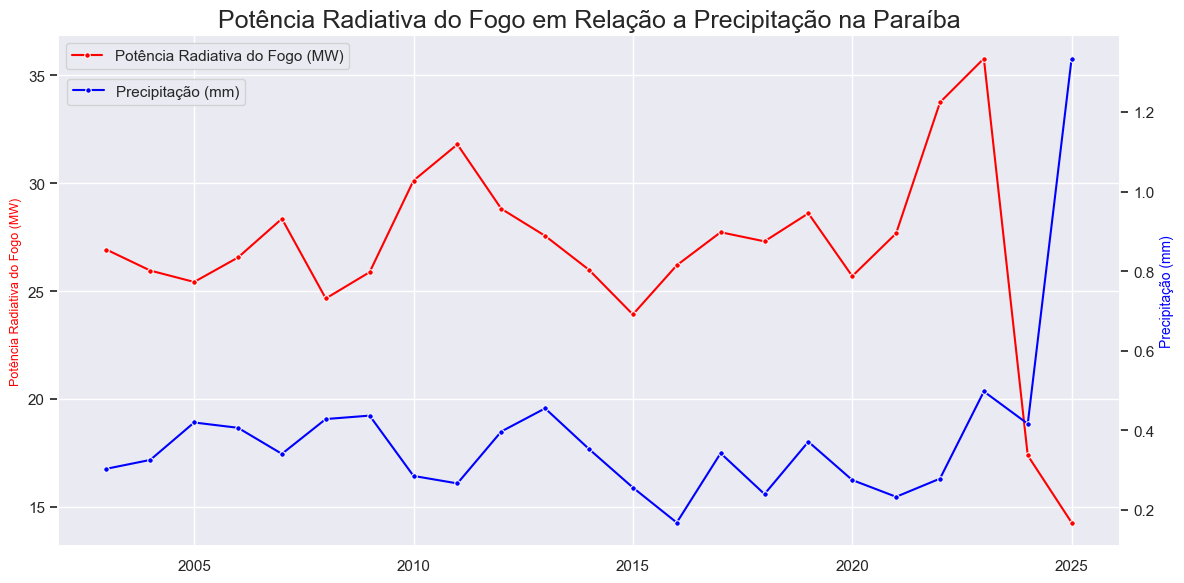

In [ ]:
sns.set_theme(style="darkgrid")
fig,ax = plt.subplots(figsize=(12, 6))

sns.lineplot(df, x="ano", y="potencia_radiativa_fogo", errorbar=None, ax=ax, label="Potência Radiativa do Fogo (MW)", color="red", marker="o", markersize=4)
ax.set_ylabel("Potência Radiativa do Fogo (MW)", color="red", fontsize=9)
ax.set_xlabel("")

ax1 = ax.twinx()
sns.lineplot(df, x="ano", y="precipitacao", errorbar=None, ax=ax1, color="blue", label="Precipitação (mm)", marker="o", markersize=4)
ax1.set_ylabel("Precipitação (mm)", color="blue", fontsize=10)
ax1.legend(loc="upper left", bbox_to_anchor=(0.001, 0.93))
ax1.set_facecolor("#0407070B")
ax1.grid(False)

plt.title("Potência Radiativa do Fogo em Relação a Precipitação na Paraíba", fontsize=18)
plt.tight_layout()
plt.show()